In [3]:
!python -V

Python 3.8.8


In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')

In [20]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

## Question 1

In [21]:
df.shape[0]

1154112

## Question 2

In [22]:
df.duration.mean()

19.1672240937939

In [26]:
df = df[df.duration <= 60]
df = df[df.duration >= 1]

In [27]:
df.shape[0]

1109826


## Question 3

In [41]:
PUna = df.PUlocationID.isnull().sum()

In [42]:
DOna = df.DOlocationID.isnull().sum()

In [43]:
PUna / df.shape[0]

0.8352732770722617

In [45]:
df.PUlocationID = df.PUlocationID.fillna(-1)
df.DOlocationID = df.DOlocationID.fillna(-1)

In [56]:
df.PUlocationID[df.PUlocationID == -1].count().sum()

927008

## Question 4

In [57]:
locations = ['PUlocationID', 'DOlocationID']

In [64]:
df[locations] = df[locations].astype(str)

In [65]:
train_dicts = df[locations].to_dict(orient='records')

In [66]:
dv = DictVectorizer()

In [67]:
X_train = dv.fit_transform(train_dicts)

In [71]:
len(dv.feature_names_)

525

In [68]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

## Question 5

In [73]:
lr = LinearRegression()

In [74]:
y_train = df.duration

In [76]:
y_train.shape, X_train.shape

((1109826,), (1109826, 525))

In [78]:
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = lr.predict(X_train)

In [81]:
mean_squared_error(y_pred, y_train, squared=False)

10.528519107206316

/home/mark/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mark/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


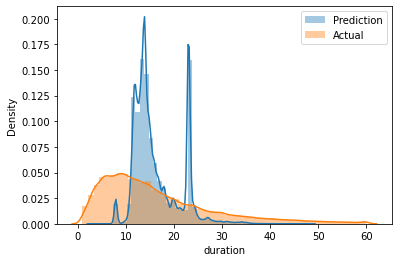

In [86]:
sns.distplot(y_pred, label = 'Prediction')
sns.distplot(y_train, label = 'Actual')
plt.legend()

## Question 6

In [94]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    df = df[(df.duration <= 60) & (df.duration >= 1)]
    df.PUlocationID = df.PUlocationID.fillna(-1)
    df.DOlocationID = df.DOlocationID.fillna(-1)
    
    locations = ['PUlocationID', 'DOlocationID']
    df[locations] = df[locations].astype(str)
    return df

In [95]:
df_train = read_dataframe('./data/fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/fhv_tripdata_2021-02.parquet')

In [96]:
len(df_train), len(df_val)

(1109826, 990113)

In [97]:
locations = ['PUlocationID', 'DOlocationID']
dv = DictVectorizer()

train_dicts = df_train[locations].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[locations].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [99]:
lr = LinearRegression()
y_train = df_train.duration
y_val = df_val.duration

In [100]:
lr.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = lr.predict(X_val)

In [102]:
mean_squared_error(y_pred, y_val, squared=False)

11.014283149347039